In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

# Show Database

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


###### Table of this Data set contains:-
    1. Gender
    2. Race/Ethnicity
    3. Parental level of education
    4. Lunch
    5. Test preparation course
    6. Math Score
    7. Reading Score
    8. Writing Score

Now we will analyse insights in the dataset and understand the connection between the variables and to uncover the underlying structure.

## Adding sum of all three subjects in new coloumn " Total "

In [5]:
data['Total']=data['math score']+data['reading score']+data['writing score']

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
Total                          1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
data.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  Total  
0                     

### Finding Different options in an coloumn

In [10]:
data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
data.shape

(1000, 9)

###### This gives Idea that we will be analysing 1000 data 

In [12]:
data.columns = data.columns.str.replace(' ', '_')

In [13]:
data.columns = data.columns.str.replace('/', '_')

In [14]:
data.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
data.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

In [16]:
data.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

## Finding Count, Max, Min, Sum, Mean, Median Under Different group rows

### Groupby Race

#### ->Math 

In [17]:
#math
data.groupby('race_ethnicity').agg(['count', 'mean', 'min', 'max','sum','median'])['math_score']

,count,mean,min,max,sum,median
race_ethnicity,,,,,,
group A,89,61.629213,28,100,5485,61.0
group B,190,63.452632,8,97,12056,63.0
group C,319,64.463950,0,98,20564,65.0
group D,262,67.362595,26,100,17649,69.0
group E,140,73.821429,30,100,10335,74.5


### ->Reading score

In [18]:
#reading 
data.groupby('race_ethnicity').agg(['count', 'mean', 'min', 'max','sum','median'])['reading_score']

,count,mean,min,max,sum,median
race_ethnicity,,,,,,
group A,89,64.674157,23,100,5756,64
group B,190,67.352632,24,97,12797,67
group C,319,69.103448,17,100,22044,71
group D,262,70.030534,31,100,18348,71
group E,140,73.028571,26,100,10224,74


### ->Writing Score

In [19]:
#reading 
data.groupby('race_ethnicity').agg(['count', 'mean', 'min', 'max','sum','median'])['writing_score']

,count,mean,min,max,sum,median
race_ethnicity,,,,,,
group A,89,62.674157,19,97,5578,62
group B,190,65.600000,15,96,12464,67
group C,319,67.827586,10,100,21637,68
group D,262,70.145038,32,100,18378,72
group E,140,71.407143,22,100,9997,72


In [20]:
data.drop('Total', axis=1, inplace=True)

### Mean and Median Graph for Race

Text(0, 0.5, 'Score')

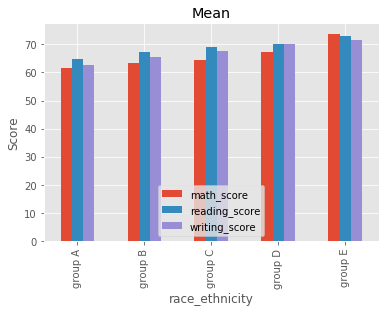

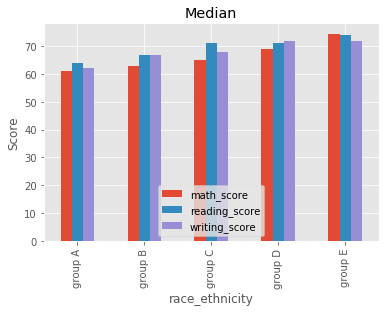

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data.groupby('race_ethnicity').mean().plot(kind='bar')
plt.title('Mean')
plt.ylabel('Score')
data.groupby('race_ethnicity').median().plot(kind='bar')
plt.title('Median')
plt.ylabel('Score')

##### From all the data collect for coloumn "  race/ethnicity ", In Regard to race both median and mean data supports that " Group E " performs best while "  Grpup A " performs poorly. Also most number of students belong to "  Group C " and their performances is above average refering to all mean and median.

### Groupby Parental Level of Education

#### ->Math Score 

In [22]:
#math 
data.groupby('parental_level_of_education').agg(['count', 'mean', 'min', 'max','sum','median'])['math_score']

,count,mean,min,max,sum,median
parental_level_of_education,,,,,,
associate's degree,222,67.882883,26,100,15070,67.0
bachelor's degree,118,69.389831,29,100,8188,68.0
high school,196,62.137755,8,99,12179,63.0
master's degree,59,69.745763,40,95,4115,73.0
some college,226,67.128319,19,100,15171,67.5
some high school,179,63.497207,0,97,11366,65.0


#### ->Reading Score

In [23]:
#reading 
data.groupby('parental_level_of_education').agg(['count', 'mean', 'min', 'max','sum','median'])['reading_score']

,count,mean,min,max,sum,median
parental_level_of_education,,,,,,
associate's degree,222,70.927928,31,100,15746,72.5
bachelor's degree,118,73.000000,41,100,8614,73.0
high school,196,64.704082,24,99,12682,66.0
master's degree,59,75.372881,42,100,4447,76.0
some college,226,69.460177,23,100,15698,70.5
some high school,179,66.938547,17,100,11982,67.0


#### ->Writing Score

In [24]:
#writing
data.groupby('parental_level_of_education').agg(['count', 'mean', 'min', 'max','sum','median'])['writing_score']

,count,mean,min,max,sum,median
parental_level_of_education,,,,,,
associate's degree,222,69.896396,35,100,15517,70.5
bachelor's degree,118,73.381356,38,100,8659,74.0
high school,196,62.448980,15,100,12240,64.0
master's degree,59,75.677966,46,100,4465,75.0
some college,226,68.840708,19,99,15558,70.0
some high school,179,64.888268,10,100,11615,66.0


### Mean and Median graph for Parental Education

Text(0, 0.5, 'Score')

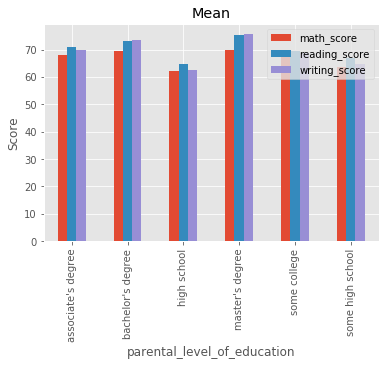

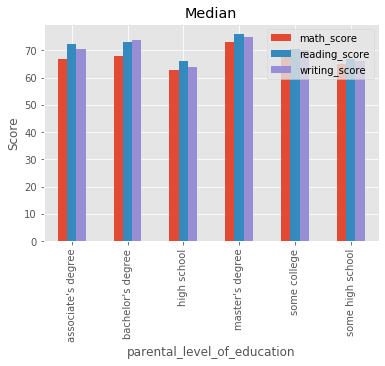

In [25]:
plt.style.use('ggplot')
data.groupby('parental_level_of_education').mean().plot(kind='bar')
plt.title('Mean')
plt.ylabel('Score')
data.groupby('parental_level_of_education').median().plot(kind='bar')
plt.title('Median')
plt.ylabel('Score')

##### From all data collected from "  parental_level_of_education ", In reference to mean and median, student's parental education with " High School " which is the lowest among all options affect the student's grade as these students have least score by mean and median with a large margin where as student's parents with " Master Degree " performs highest with student's parents with " Bacheolar's degree " at close second

### Groupby Gender

#### ->Math Score 

In [26]:
#math
data.groupby('gender').agg(['count', 'mean', 'min', 'max','sum','median'])['math_score']

,count,mean,min,max,sum,median
gender,,,,,,
female,518,63.633205,0,100,32962,65
male,482,68.728216,27,100,33127,69


#### ->Reading Score

In [27]:
#reading
data.groupby('gender').agg(['count', 'mean', 'min', 'max','sum','median'])['reading_score']

,count,mean,min,max,sum,median
gender,,,,,,
female,518,72.608108,17,100,37611,73
male,482,65.473029,23,100,31558,66


#### ->Writing Score

In [28]:
#writing
data.groupby('gender').agg(['count', 'mean', 'min', 'max','sum','median'])['writing_score']

,count,mean,min,max,sum,median
gender,,,,,,
female,518,72.467181,10,100,37538,74
male,482,63.311203,15,100,30516,64


### Mean and Median graph for gender

Text(0, 0.5, 'Score')

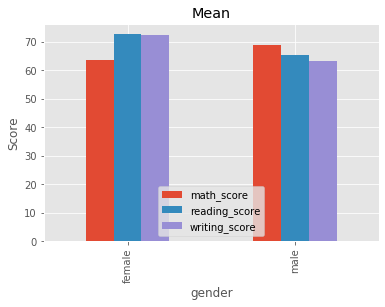

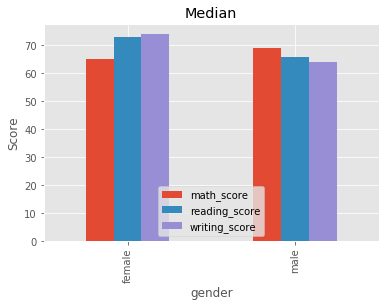

In [29]:
data.groupby('gender').mean().plot(kind='bar')
plt.title('Mean')
plt.ylabel('Score')
data.groupby('gender').median().plot(kind='bar')
plt.title('Median')
plt.ylabel('Score')

##### All data collected from coloumn "  Gender ", overall in all three subjects GIRLS perform better than BOYS but in Maths BOYS outperformed the GIRLS with a huge margin

### Groupby Lunch

#### ->Math Score 

In [30]:
#math
data.groupby('lunch').agg(['count', 'mean', 'min', 'max','sum','median'])['math_score']

,count,mean,min,max,sum,median
lunch,,,,,,
free/reduced,355,58.921127,0,100,20917,60
standard,645,70.034109,19,100,45172,69


#### ->Reading Score

In [31]:
#reading
data.groupby('lunch').agg(['count', 'mean', 'min', 'max','sum','median'])['reading_score']

,count,mean,min,max,sum,median
lunch,,,,,,
free/reduced,355,64.653521,17,100,22952,65
standard,645,71.654264,26,100,46217,72


#### ->Writing Score

In [32]:
#Writing
data.groupby('lunch').agg(['count', 'mean', 'min', 'max','sum','median'])['writing_score']

,count,mean,min,max,sum,median
lunch,,,,,,
free/reduced,355,63.022535,10,100,22373,64
standard,645,70.823256,22,100,45681,72


### Mean and Median graph for Lunch Available

Text(0, 0.5, 'Score')

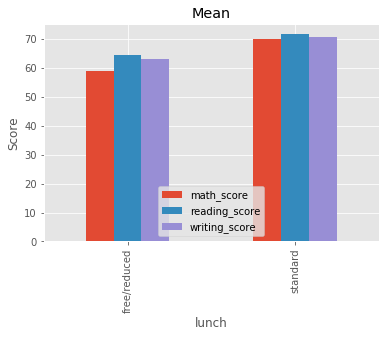

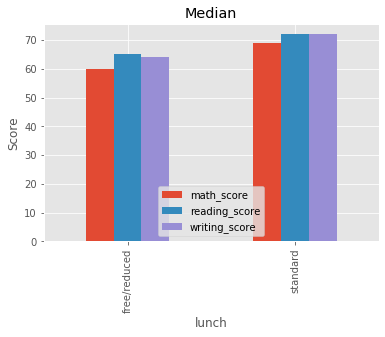

In [33]:
data.groupby('lunch').mean().plot(kind='bar')
plt.title('Mean')
plt.ylabel('Score')
data.groupby('lunch').median().plot(kind='bar')
plt.title('Median')
plt.ylabel('Score')

##### All data collected from coloumn "  Lunch ", it is very consistant that if the basic standard lunch is not provided then it'll directly affect thier scores in all the subjects. Students with free/reduced lunch are out performed by students with standard lunch with a huge margin

### Groupby Test Preparation of course

#### ->Math Score

In [34]:
#math
data.groupby('test_preparation_course').agg(['count', 'mean', 'min', 'max','sum','median'])['math_score']

,count,mean,min,max,sum,median
test_preparation_course,,,,,,
completed,358,69.695531,23,100,24951,69
none,642,64.077882,0,100,41138,64


#### ->Reading Score

In [35]:
#reading
data.groupby('test_preparation_course').agg(['count', 'mean', 'min', 'max','sum','median'])['reading_score']

,count,mean,min,max,sum,median
test_preparation_course,,,,,,
completed,358,73.893855,37,100,26454,75
none,642,66.534268,17,100,42715,67


#### ->Writing Score

In [36]:
#writing
data.groupby('test_preparation_course').agg(['count', 'mean', 'min', 'max','sum','median'])['writing_score']

,count,mean,min,max,sum,median
test_preparation_course,,,,,,
completed,358,74.418994,36,100,26642,76
none,642,64.504673,10,100,41412,65


### Mean and Median Graph

Text(0, 0.5, 'Score')

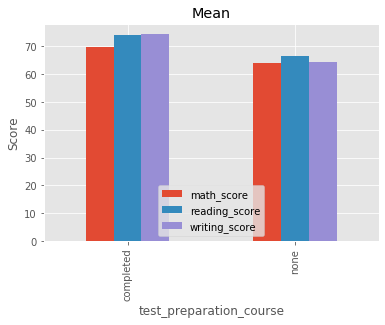

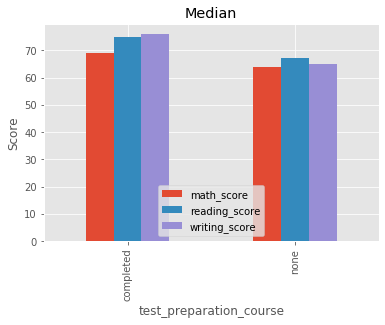

In [37]:
data.groupby('test_preparation_course').mean().plot(kind='bar')
plt.title('Mean')
plt.ylabel('Score')
data.groupby('test_preparation_course').median().plot(kind='bar')
plt.title('Median')
plt.ylabel('Score')

##### All data collected from coloumn "  test_preparation_course ", it is noticed that most students don't prepare in advance and by mean and median students with test preparation NONE perform worst by a very big margin as compared to students with advance preparation COMPLETED regardless of subjects

In [38]:
import csv
csv_f = csv.reader(data)

for row in csv_f:
    print(row[0])

gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course
math_score
reading_score
writing_score


In [39]:
a1=data['math_score']
a2=data['reading_score']
a3=data['writing_score']
data_to_plot = [a1, a2, a3]

## Voilin Plot of Math, Reading and writing score

Text(0, 0.5, 'Score')

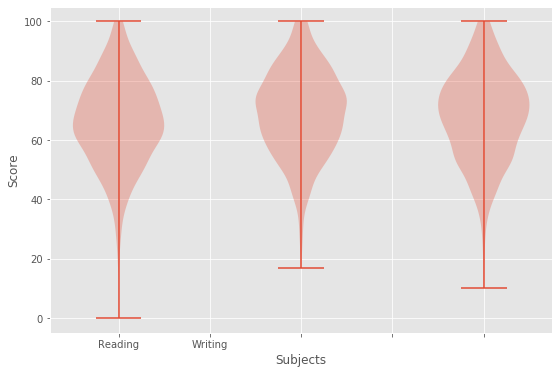

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.violinplot(data_to_plot)
plt.xlabel('Subjects')
ax.set_xticklabels(['Math', 'Reading', 'Writing'])
plt.ylabel('Score')

##### This Voilin plot gives the overall idea of all the students preforming in different students. Here most students are clearly struggling in MATH while in READING they are clearly performing better but in WRITING it is distributed as some students perform better and some students bad

### Box Plot Groupby Race

#### ->Math Score

Text(0, 0.5, 'Score')

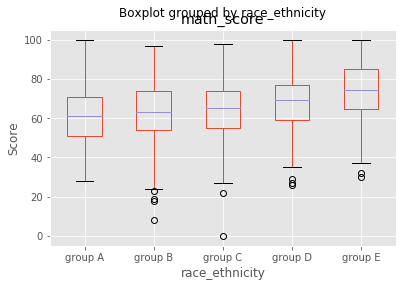

In [41]:
data.boxplot(column=['math_score'],by='race_ethnicity')
plt.ylabel('Score')

#### ->Reading Score

Text(0, 0.5, 'Score')

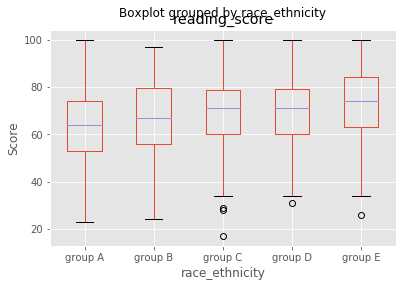

In [42]:
data.boxplot(column=['reading_score'],by='race_ethnicity')
plt.ylabel('Score')

#### ->Writing Score

Text(0, 0.5, 'Score')

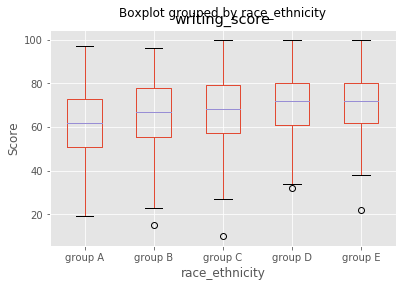

In [43]:
data.boxplot(column=['writing_score',],by='race_ethnicity')
plt.ylabel('Score')

##### In all three Boxplot, Students belonging to race Group E performs better in all three subjects and the lowest point of Group E in box plot is highest describing that all students perform better keeping the scores higher

### Box Plot Group by Parental Education

#### ->Math Score

Text(0, 0.5, 'Score')

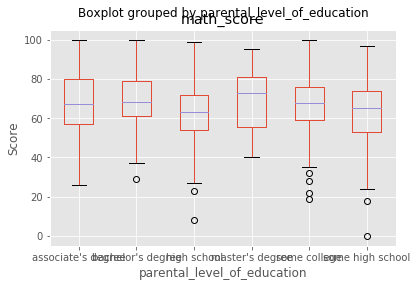

In [44]:
data.boxplot(column=['math_score'],by='parental_level_of_education')
plt.ylabel('Score')

#### ->Reading Score

Text(0, 0.5, 'Score')

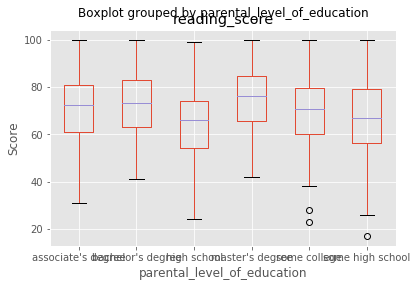

In [45]:
data.boxplot(column=['reading_score'],by='parental_level_of_education')
plt.ylabel('Score')

#### ->Writing Score

Text(0, 0.5, 'Score')

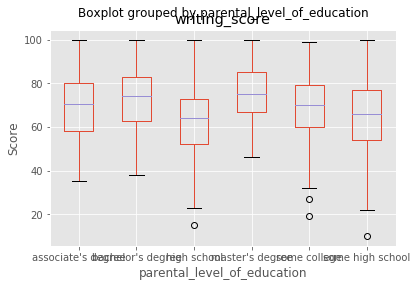

In [46]:
data.boxplot(column=['writing_score'],by='parental_level_of_education')
plt.ylabel('Score')

##### Here all boxes are mostly consistant except for those students whose parents level of education is " High School " as their highest and lowest part of box plot are the lowest among all. Students whose parents have" Bachoelar Degree or Master's Degree" performs consistantly well

### Box Plot Group by Gender

#### ->Math Score

Text(0, 0.5, 'Score')

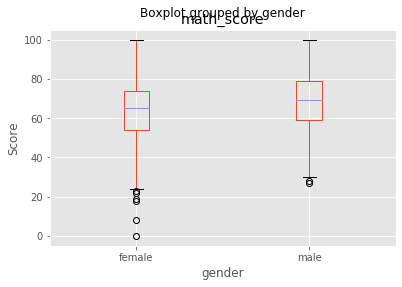

In [47]:
data.boxplot(column=['math_score'],by='gender')
plt.ylabel('Score')

#### ->Reading Score

Text(0, 0.5, 'Score')

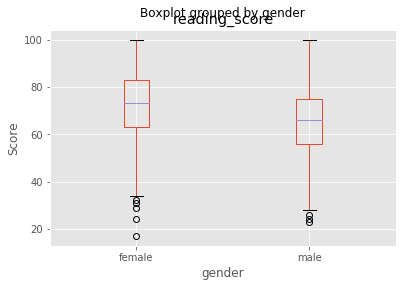

In [48]:
data.boxplot(column=['reading_score'],by='gender')
plt.ylabel('Score')

#### ->Writing Score

Text(0, 0.5, 'Score')

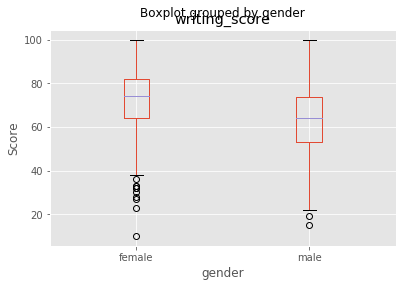

In [49]:
data.boxplot(column=['writing_score'],by='gender')
plt.ylabel('Score')

##### Here GIRL students only fall behind in MATH, in other 2 subjects they Perform very well than the BOYS but the gap in MATH score very very wide

### Box Plot Group by Lunch

#### ->Math Score

Text(0, 0.5, 'Score')

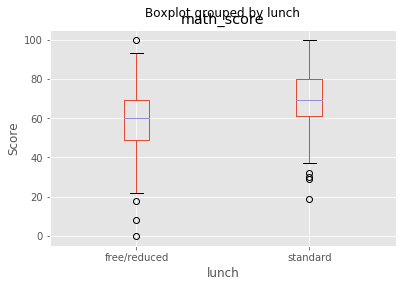

In [50]:
data.boxplot(column=['math_score'],by='lunch')
plt.ylabel('Score')

#### ->Reading Score

Text(0, 0.5, 'Score')

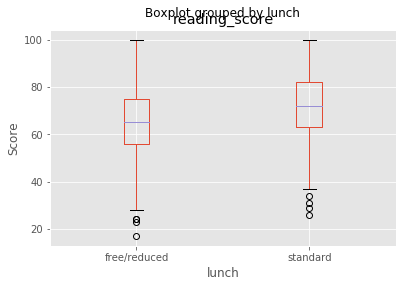

In [51]:
data.boxplot(column=['reading_score'],by='lunch')
plt.ylabel('Score')

#### ->Writing Score

Text(0, 0.5, 'Score')

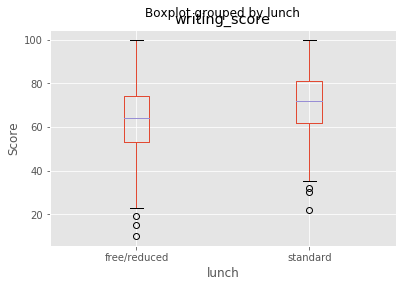

In [52]:
data.boxplot(column=['writing_score'],by='lunch')
plt.ylabel('Score')

##### It is very clear especially in case of MATH, that standard lunch helps students in their studies. The gap in maths is very wide that even lowest point of boxplot of STANDARD is closer to highest point of students with FREE/REDUCED lunch and in other subjects also outcome is same 

### Box plot group by Test preparation of the course

#### ->Math Score

Text(0, 0.5, 'Score')

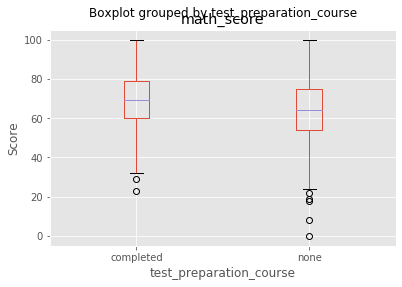

In [53]:
data.boxplot(column=['math_score'],by='test_preparation_course')
plt.ylabel('Score')

#### ->Reading Score

Text(0, 0.5, 'Score')

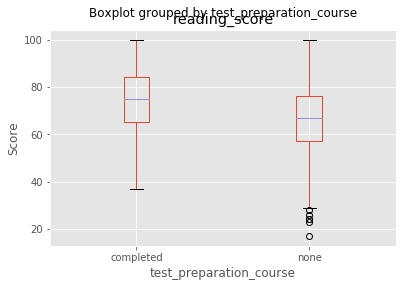

In [54]:
data.boxplot(column=['reading_score'],by='test_preparation_course')
plt.ylabel('Score')

#### ->Writing Score

Text(0, 0.5, 'Score')

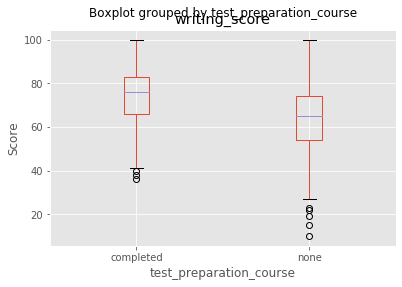

In [55]:
data.boxplot(column=['writing_score'],by='test_preparation_course')
plt.ylabel('Score')

##### Here we can say Test preparation helps students definitely but not by huge margin. Some students with test preparation course NONE have been scoring well along with students with test preparation course COMPLETED

### Violin plot of Total score of all three subjects 

In [56]:
data['Total']=data['math_score']+data['reading_score']+data['writing_score']

[Text(0, 0, 'Total')]

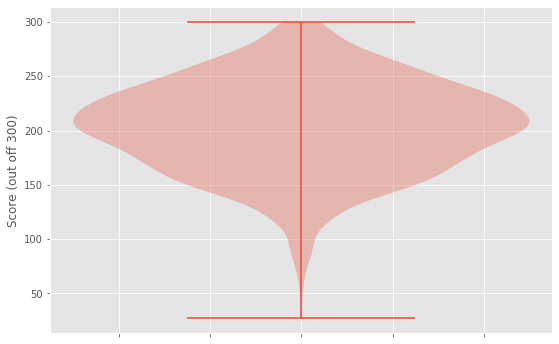

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.violinplot(data['Total'])
plt.ylabel('Score (out off 300)')
ax.set_xticklabels(['Total'])

#### Here in combining all three subjects we can see that most students score total between 200 and 250 only but this also gives data of students who even combining all 3 subjects can't score more than 100

## Conclusion
From studing all the data above comparing and plotting them, we can see that:-
 1. GIRLS outperform BOYS overall but their strength is even less than half of boys.
 2. Some students are performing very poorly as their combined score of all three subjects can't cross even 1/3rd of total.
 3. Some students even score full in all three subjects.
 4. Student's Lunch and Parental level of education affect student's score poorly.
 5. Even though Race can't be considered as proper factor then also GROUP E out performed every other group.
 6. Test preparation course don't affect majorly in student's score.